## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 : 신인철
- 점수 :

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

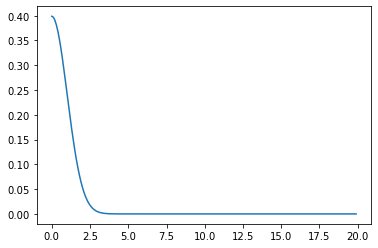

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,20,0.1) 
pdf = stats.norm.pdf(x)
plt.plot(x,pdf)

Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

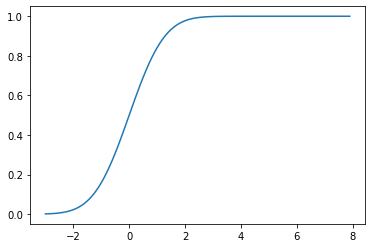

In [5]:
x = np.arange(-3,8,0.1)
cdf = stats.norm.cdf(x)
plt.plot(x,cdf)

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [101]:
import pandas as pd

df1 = pd.read_csv('dataset/5_2_fm.csv')
df2 = df1.copy()
df2.replace({'A':'C','B':'D'},inplace=True)

In [102]:
df2.head()

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8


In [103]:
df2.loc[df2['species'] == 'C','length'] = df2.length * 2
df2.loc[df2['species'] == 'D','length'] = df2.length * 3
df2


,species,length
0,C,4
1,C,6
2,C,8
3,D,18
4,D,24
5,D,30


In [123]:
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
print(df.groupby('species').mean())
print(df.groupby('species').std())

         length
species        
A           3.0
B           8.0
C           6.0
D          24.0
         length
species        
A           1.0
B           2.0
C           2.0
D           6.0


Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [48]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")

In [53]:
shoes = pd.concat([shoes,shoes])
shoes.pivot_table(values=['sales'],index=['store'],columns=['color'],aggfunc='sum')

sales    
color  blue red
store          
osaka    52  36
tokyo    40  60

Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도(표준오차 - 1), 표준오차
- 신뢰구간 계산 

In [40]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [41]:
# 모평균의 점추정
mu = np.mean(fish)
round(mu,2)

4.19

In [42]:
# 모분산의 점추정
mu = np.var(fish,ddof=1)
round(mu,2)

0.68

Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

<AxesSubplot:xlabel='None-sex', ylabel='pclass'>

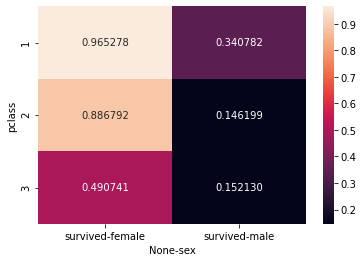

In [212]:
import seaborn as sns
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)
data = titanic.pivot_table(index=['pclass'],columns=['sex'],values=['survived'],aggfunc='mean')
sns.heatmap(data,annot=True,fmt='f')
# 클래스와 상관없이 여자가 남자보다 생존률이 높다
# 여성이어도 클래스가 올라갈수록 더 생존률이 높아진다
# 퍼스트 클래스 남성이어도 써드 클래스 여성보다 생존률이 낮다 그러므로 클래스와 상관없이 여성이 남성보다 생존률이 높다

Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [183]:
a = np.random.randint(1,11,size=(4,5))
b = np.random.randint(1,11,size=(5,3))
np.dot(a,b)

array([[168, 154, 162],
       [195, 186, 256],
       [116,  87,  82],
       [182, 157, 235]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [126]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)


   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

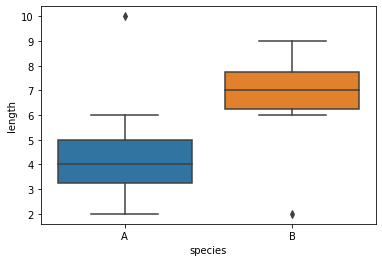

In [134]:
sns.boxplot(x='species',y='length',data=fish_multi)

In [135]:
def wow(a):
    q1, q3 = np.percentile(a,[25,75])
    iqr = q3 - q1
    return a[((a <= (q1 - 1.5 * iqr)) | (a >= (q3 + 1.5 * iqr)))]

a = wow(fish_multi.groupby(['species']).get_group('A')['length'])
b = wow(fish_multi.groupby(['species']).get_group('B')['length'])
print(a)
print(b)

5    10
Name: length, dtype: int64
10    2
Name: length, dtype: int64


In [157]:
fish_multi.iloc[5:6] = np.nan
fish_multi[10:11] = np.nan
fish_multi.dropna(inplace=True)
fish_multi.isnull().sum()

species    0
length     0
dtype: int64

<AxesSubplot:xlabel='species', ylabel='length'>

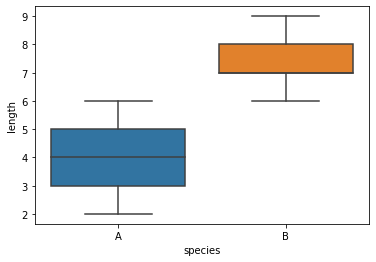

In [210]:
sns.boxplot(x='species',y='length',data=fish_multi)


<AxesSubplot:xlabel='species', ylabel='length'>

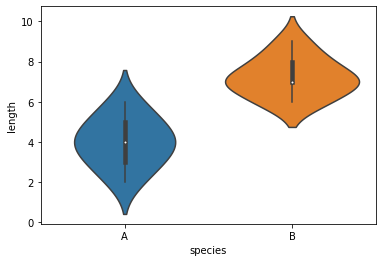

In [211]:
sns.violinplot(x='species',y='length',data=fish_multi)

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

In [160]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:xlabel='weight', ylabel='Count'>

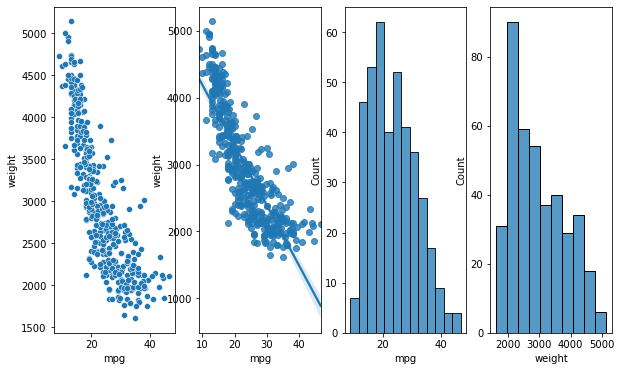

In [190]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='mpg',y='weight',data=df_auto,ax=ax1)
sns.regplot(x='mpg',y='weight',data=df_auto,ax=ax2)
sns.histplot(df_auto.mpg,ax=ax3)
sns.histplot(df_auto.weight,ax=ax4)
# 무게와 연비는 음의 상관관계다
# 무게가 높아질 수록 연비는 안좋아진다
# 대부분의 차가 무게평균기준 아래에 위치해 있다


/Users/shin-incheol/downloads/d/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


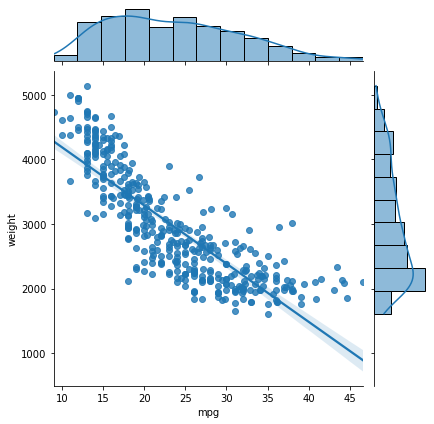

In [213]:
sns.jointplot('mpg','weight',data=df_auto,kind='reg')

Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

[    10    110    210 ...  99810  99910 100010]


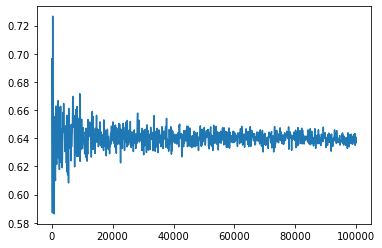

In [215]:
population = stats.norm(loc = 4, scale = 0.8)

sample_size = np.arange(10,100100,100)
sample_size
print(sample_size)
sample_var = np.zeros(len(sample_size))

for i in range(len(sample_size)):
    sample = population.rvs(size=sample_size[i])
    var = np.var(sample,ddof=1)
    sample_var[i] = var


plt.plot(sample_size,sample_var)

In [196]:
np.var(population.rvs(10),ddof=1)

0.8372446726489873